In [1]:
# R version 4.1.0 #
# Load packages: Seurat_4.1.1, RColorBrewer_1.1-3, ggplot2_3.3.6, extrafont_0.18\
packages = c('Seurat','RColorBrewer','ggplot2','extrafont')

for (p in packages){
    suppressPackageStartupMessages(eval(bquote(library(.(p)))))
}


In [2]:
seurat <- readRDS('source_data/from_GEO/ds_seurat_PCA_UMAP_clusters_ds38_min10_v4.rds') # download from GEO; also saved in seurat_ds38_min10_v4.R

to_include = c('t1_2hr_WT_20210722','t1_20min_WT_20210722','t1_undil_WT_20210722',
               't2_20min_WT_20210722','t2_undil_WT_20210722','t3_undil_WT_20210722',
               't4_2hr_WT_20210722','t4_1hr_WT_20210722','t4_20min_WT_20210722','t4_undil_WT_20210722',
               't1_2hr_metG_20210623','t1_20min_metG_20210623','t1_undil_metG_20210623',
               't2_2hr_metG_20210623','t2_20min_metG_20210623','t2_undil_metG_20210623','t3_undil_metG_20210623',
               't4_2hr_metG_20210623','t4_20min_metG_20210623','t4_undil_metG_20210623',
               'WT_1hr_20220331','WT_30min_20220331','WT_10min_20220331','WT_3min_20220331','WT_stat_20220331',
               'metG6_20201018_1','metG5_20201018_1','metG4_20201018_1','metG3_20201018_1','metG2_20200926','metG1_20200926','WT_10min_20220210')
seurat@active.ident <- seurat$cell.type
seurat <- subset(seurat,idents=to_include)

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
First group.by variable `ident` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.


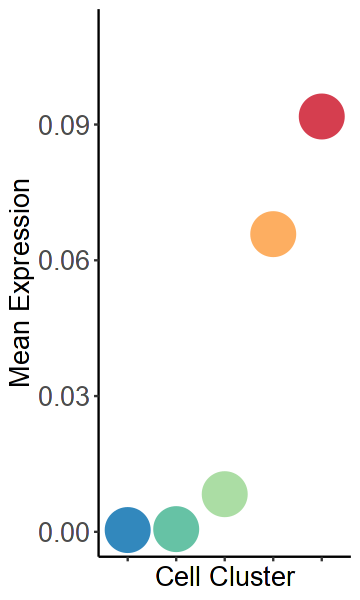

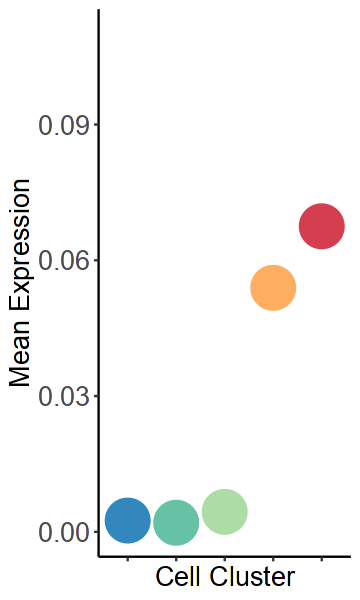

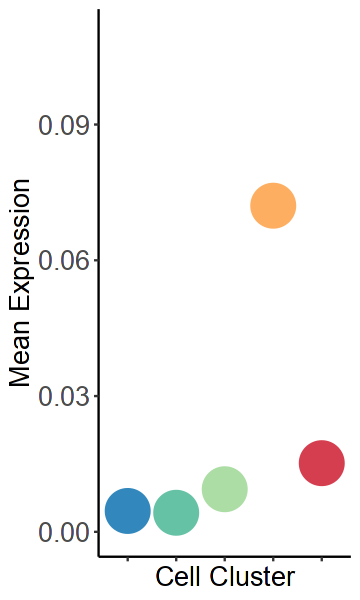

In [3]:
options(repr.plot.width=3, repr.plot.height=5)
seurat@active.ident <- seurat$seurat_clusters
my_cols = brewer.pal(10,"Spectral")

terms <- c('rmf','cysK','mdtK')
for (term in terms){
    marker_list <- c(term)
    term_avg <- colMeans(AverageExpression(seurat,slot='data',features=marker_list)$RNA)
    df <- data.frame(rev(term_avg[2:6]))
    df['cluster'] = rev(c('1','2','3','4','5'))
    #df = df[order(df[,'cluster']),]
    df['border'] = rev(c('1','2','3','4','5'))
    fill_colors = rev(my_cols[c(2,4,7,8,9)])
    labels = rev(c("Stationary","Persister","Early Lag","Late Lag","Early Exponential"))
    border_colors = fill_colors
    p <- ggplot(data=df, aes(x=cluster, y=term_avg[2:6],group=1,fill=border,color=border)) +
        geom_point(size=8,shape=21,stroke=3) + theme_classic() + scale_fill_manual(values=fill_colors,name='',labels=labels) + 
        scale_color_manual(values=border_colors,name='',labels=labels) + 
        theme(text=element_text(family= "Arial", size=16),legend.position='none',
            axis.text.y = element_text(family= "Arial", size=16),
            axis.text.x = element_blank()) + 
        xlab('Cell Cluster') + ylab('Mean Expression') + ylim(0,0.11)
    filename = paste('figures/figED3_expression_',term,'.pdf',sep='')
    print(p)
    ggsave(filename,width=3,height=5)
}